In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from created_functions import *

In [5]:
df = pd.read_csv("C:/Users/Lenovo/Documents/GitHub/Brain-Tumor-Datection/Created Dataset/var_skew_dataset.csv")



In [6]:
df.head()

,Mean,std,Variance,Skewness,Entropy,RMS,Kurtios,HMI1,HMI2,HMI3,...,homogeneity4,energy1,energy2,energy3,energy4,correlation1,correlation2,correlation3,correlation4,Class
0,55.212544,46.056565,2121.207208,0.370450,5.375762,9.302612,-0.628678,2.752905,8.030957,11.070417,...,0.513325,0.177499,0.172328,0.180325,0.171641,0.969317,0.959636,0.974818,0.958198,0
1,76.037273,79.565990,6330.746828,0.585233,5.781641,7.635726,-0.877843,2.904895,7.803627,12.448359,...,0.432991,0.230150,0.221221,0.232777,0.221043,0.969677,0.958555,0.973180,0.957760,0
2,53.652053,59.587603,3550.682395,1.574931,4.946379,10.302398,2.218936,2.779911,7.267831,10.447366,...,0.490227,0.232071,0.220649,0.233649,0.221646,0.949499,0.932350,0.958399,0.931763,0
3,49.231160,42.645217,1818.614523,0.483434,6.123446,10.533521,-1.392569,2.778616,7.928608,10.892414,...,0.450451,0.374133,0.365637,0.379210,0.367641,0.913667,0.891387,0.927097,0.891294,0
4,77.261385,83.705507,7006.611845,0.747321,6.017668,7.935202,-0.774676,2.996775,7.602490,11.633094,...,0.444437,0.312793,0.304938,0.317934,0.302303,0.923784,0.898480,0.934894,0.898350,0


In [7]:
data_analysis(df)

The shape of the data set:
The data set consists of 5217 rows and 40 columns.

***********************************************
The existence of missing values in each column:
Mean                   False
std                    False
Variance               False
Skewness               False
Entropy                False
RMS                    False
Kurtios                False
HMI1                   False
HMI2                   False
HMI3                   False
HMI4                   False
Area                    True
Perimeter               True
Circle                  True
Convex Area             True
Solidity                True
Equivalent Diameter     True
Major Axis              True
Minor Axis              True
contrast1              False
contrast2              False
contrast3              False
contrast4              False
dissimilarity1         False
dissimilarity2         False
dissimilarity3         False
dissimilarity4         False
homogeneity1           False
homogeneity2 

In [80]:
# df = df.dropna()

missing_data = ['Area', 'Perimeter', 'Circle', 'Convex Area', 'Solidity', 'Equivalent Diameter', 'Major Axis', 'Minor Axis']
for i in missing_data:
    fill_list = df[i].dropna().tolist()
    # df[i] = df[i].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))
    mean_fill = np.mean(fill_list)
    df[i] = df[i].fillna(mean_fill)
df.isnull().sum()

Mean                   0
std                    0
Variance               0
Skewness               0
Entropy                0
RMS                    0
Kurtios                0
HMI1                   0
HMI2                   0
HMI3                   0
HMI4                   0
Area                   0
Perimeter              0
Circle                 0
Convex Area            0
Solidity               0
Equivalent Diameter    0
Major Axis             0
Minor Axis             0
contrast1              0
contrast2              0
contrast3              0
contrast4              0
dissimilarity1         0
dissimilarity2         0
dissimilarity3         0
dissimilarity4         0
homogeneity1           0
homogeneity2           0
homogeneity3           0
homogeneity4           0
energy1                0
energy2                0
energy3                0
energy4                0
correlation1           0
correlation2           0
correlation3           0
correlation4           0
Class                  0


In [81]:
X = df.drop(columns=["Class"])
y = df["Class"]

## feature selection

In [82]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Initialize the feature selector
k_best = SelectKBest(score_func=mutual_info_classif, k=20)  # Select the top 2 features based on mutual information

feature_names = ['Mean', 'std','Variance','Skewness', 'Entropy', 'RMS', 'Kurtios', 'HMI1', 'HMI2', 'HMI3',
       'HMI4', 'Area', 'Perimeter', 'Circle', 'Convex Area', 'Solidity',
       'Equivalent Diameter', 'Major Axis', 'Minor Axis', 'contrast1',
       'contrast2', 'contrast3', 'contrast4', 'dissimilarity1',
       'dissimilarity2', 'dissimilarity3', 'dissimilarity4', 'homogeneity1',
       'homogeneity2', 'homogeneity3', 'homogeneity4', 'energy1', 'energy2',
       'energy3', 'energy4', 'correlation1', 'correlation2', 'correlation3',
       'correlation4']

# Apply feature selection to the data
X_selected = k_best.fit_transform(X, y)

# Get the selected feature indices and scores
selected_indices = k_best.get_support(indices=True)
selected_scores = k_best.scores_

# Sort the features based on scores in ascending order
sorted_features = sorted(zip(selected_indices, selected_scores), key=lambda x: x[1], reverse=True)
X_select = pd.DataFrame()
# Print the top 20 features in ascending order
ll=[]
for idx, score in sorted_features[:20]:
    ll.append(feature_names[idx])
    print(f"Feature {feature_names[idx]}: Score {score}")

Feature Mean: Score 0.47114247635587847
Feature std: Score 0.4704960449659905
Feature Variance: Score 0.4704889978217637
Feature contrast4: Score 0.4661881218395143
Feature correlation4: Score 0.46088780747691893
Feature contrast2: Score 0.30537128586209317
Feature contrast3: Score 0.2910232825428394
Feature contrast1: Score 0.2804242973388842
Feature energy3: Score 0.27467010913982337
Feature HMI1: Score 0.2677576730024738
Feature energy4: Score 0.2664441613350155
Feature dissimilarity4: Score 0.24960939822613115
Feature energy2: Score 0.23339908192789682
Feature correlation3: Score 0.23254402321343637
Feature correlation1: Score 0.23161359864250608
Feature dissimilarity1: Score 0.22858090213767568
Feature correlation2: Score 0.1989732696574329
Feature dissimilarity3: Score 0.15566827057320065
Feature dissimilarity2: Score 0.1389583480224612
Feature energy1: Score 0.1371073075616529


## select best features only

In [83]:
X_select = X[ll]

In [84]:
X_select

,Mean,std,Variance,contrast4,correlation4,contrast2,contrast3,contrast1,energy3,HMI1,energy4,dissimilarity4,energy2,correlation3,correlation1,dissimilarity1,correlation2,dissimilarity3,dissimilarity2,energy1
0,55.212544,46.056565,2121.207208,190.455883,0.958198,183.902674,114.986416,140.013325,0.180325,2.752905,0.171641,4.859588,0.172328,0.974818,0.969317,3.831805,0.959636,3.082982,4.735315,0.177499
1,76.037273,79.565990,6330.746828,512.597992,0.957760,502.955136,325.904539,368.273419,0.232777,2.904895,0.221043,8.872275,0.221221,0.973180,0.969677,6.768184,0.958555,6.198473,8.761257,0.230150
2,53.652053,59.587603,3550.682395,556.220494,0.931763,551.439410,339.474792,411.974803,0.233649,2.779911,0.221646,8.784037,0.220649,0.958399,0.949499,6.668132,0.932350,6.031714,8.844310,0.232071
3,49.231160,42.645217,1818.614523,535.851169,0.891294,535.392752,361.157438,427.392473,0.379210,2.778616,0.367641,10.319736,0.365637,0.927097,0.913667,8.527744,0.891387,7.879728,10.431541,0.374133
4,77.261385,83.705507,7006.611845,997.611651,0.898350,996.340638,644.759621,753.461519,0.317934,2.996775,0.302303,14.967293,0.304938,0.934894,0.923784,11.950924,0.898480,10.607111,14.913752,0.312793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5212,55.537216,41.476325,1720.285572,371.946740,0.912128,360.145406,213.722145,285.485452,0.154335,2.678192,0.144780,7.500077,0.145493,0.949625,0.932639,5.922500,0.914916,4.884709,7.329037,0.149783
5213,58.451622,42.845989,1835.778749,329.672273,0.920016,325.038720,184.926555,263.393509,0.141475,2.700193,0.131985,7.338640,0.132942,0.955264,0.936218,5.841866,0.921140,4.831209,7.204017,0.136611
5214,45.893677,33.173744,1100.497301,220.971159,0.910542,208.513996,123.585835,164.600526,0.082941,2.585893,0.076869,5.813055,0.077379,0.950032,0.933455,4.430714,0.915585,3.914038,5.633784,0.081568
5215,41.703392,36.594254,1339.139410,258.275182,0.926715,260.407608,164.764602,185.530025,0.102649,2.608306,0.095976,6.656449,0.096011,0.953305,0.947402,5.071237,0.926110,4.619081,6.705807,0.100671


# models with whole dataset

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## RF

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
# Fit the parameters before oversampling:
rf_clf.fit(X_train, y_train)
print(f"Train Acc of Random Forest : {rf_clf.score(X_train,y_train)}")
# rf_clf.score(X_test,y_test)
print(f"Test Acc of Random Forest : {rf_clf.score(X_test,y_test)}")

Train Acc of Random Forest : 1.0
Test Acc of Random Forest : 0.9022988505747126


## SVM

In [87]:
from sklearn.svm import SVC
clf1 = SVC(kernel='rbf',C=100,gamma=0.001)
clf1.fit(X_train, y_train)
print(f"Train Acc of SVM : {clf1.score(X_train,y_train)}")
print(f"Test Acc of SVM : {clf1.score(X_test,y_test)}")

Train Acc of SVM : 1.0
Test Acc of SVM : 0.5172413793103449


## KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier

# create KNeighborsClassifier with 7 neighbors 
knn = KNeighborsClassifier(n_neighbors=7)
# Fit the data to knn model
knn.fit(X_train,y_train)
print(f"Train acc of KNN: {knn.score(X_train,y_train)}")
print(f"Test acc of KNN: {knn.score(X_test,y_test)}")

Train acc of KNN: 0.7414330218068536
Test acc of KNN: 0.6695402298850575


## PCA and StandardScaler

In [89]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca_m = PCA(n_components=37)

new_X = pca_m.fit_transform(X)
scaler = StandardScaler()
new_X = scaler.fit_transform(new_X)

## split data after pca and scaler

In [90]:
X_trainn,X_testn,y_trainn,y_testn = train_test_split(new_X,y,test_size=0.2,random_state=42)

## RF PCA

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf_clf2 = RandomForestClassifier()
# Fit the parameters before oversampling:
rf_clf2.fit(X_trainn, y_trainn)
print(f"Train Acc of Random Forest PCA : {rf_clf2.score(X_trainn,y_trainn)}")
print(f"Test Acc of Random Forest PCA : {rf_clf2.score(X_testn,y_testn)}")

Train Acc of Random Forest PCA : 1.0
Test Acc of Random Forest PCA : 0.9042145593869731


## SVM PCA

In [92]:
from sklearn.svm import SVC
clf2 = SVC(kernel='linear',C=100,gamma=0.001)
clf2.fit(X_trainn, y_trainn)

print(f"Train Acc of SVM PCA : {clf2.score(X_trainn,y_trainn)}")
print(f"Test Acc of SVM PCA : {clf2.score(X_testn,y_testn)}")

Train Acc of SVM PCA : 0.8847352024922118
Test Acc of SVM PCA : 0.8620689655172413


## KNN PCA

In [93]:
knn2 = KNeighborsClassifier(n_neighbors=7)
# Fit the data to knn model
knn2.fit(X_trainn,y_trainn)
print(f"Train acc of KNN PCA : {knn2.score(X_trainn,y_trainn)}")
print(f"Test acc of KNN PCA : {knn2.score(X_testn,y_testn)}")

Train acc of KNN PCA : 0.9094176851186196
Test acc of KNN PCA : 0.8735632183908046


# selected features

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_select,y,test_size=0.2,random_state=42)

## RF Selected

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
# Fit the parameters before oversampling:
rf_clf.fit(X_train, y_train)
print(f"Train Acc of Random Forest : {rf_clf.score(X_train,y_train)}")
# rf_clf.score(X_test,y_test)
print(f"Test Acc of Random Forest : {rf_clf.score(X_test,y_test)}")

Train Acc of Random Forest : 1.0
Test Acc of Random Forest : 0.8764367816091954


## SVM Selected

In [96]:
from sklearn.svm import SVC
clf1 = SVC(kernel='rbf',C=100,gamma=0.001)
clf1.fit(X_train, y_train)
print(f"Train Acc of SVM : {clf1.score(X_train,y_train)}")
print(f"Test Acc of SVM : {clf1.score(X_test,y_test)}")

Train Acc of SVM : 1.0
Test Acc of SVM : 0.7452107279693486


## KNN Selected

In [97]:
from sklearn.neighbors import KNeighborsClassifier

# create KNeighborsClassifier with 7 neighbors 
knn = KNeighborsClassifier(n_neighbors=7)
# Fit the data to knn model
knn.fit(X_train,y_train)
print(f"Train acc of KNN: {knn.score(X_train,y_train)}")
print(f"Test acc of KNN: {knn.score(X_test,y_test)}")

Train acc of KNN: 0.7768991133477114
Test acc of KNN: 0.6906130268199234


## With PCA and StandardScaler

In [98]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca_m = PCA(n_components=20)

new_X = pca_m.fit_transform(X_select)
scaler = StandardScaler()
new_X = scaler.fit_transform(new_X)

## Split Selected

In [99]:
X_trainn,X_testn,y_trainn,y_testn = train_test_split(new_X,y,test_size=0.2,random_state=42)

## RF Selected PCA

In [100]:
from sklearn.ensemble import RandomForestClassifier
rf_clf2 = RandomForestClassifier()
# Fit the parameters before oversampling:
rf_clf2.fit(X_trainn, y_trainn)
print(f"Train Acc of Random Forest PCA : {rf_clf2.score(X_trainn,y_trainn)}")
print(f"Test Acc of Random Forest PCA : {rf_clf2.score(X_testn,y_testn)}")

Train Acc of Random Forest PCA : 1.0
Test Acc of Random Forest PCA : 0.8917624521072797


## SVM Selected PCA

In [101]:
from sklearn.svm import SVC
clf2 = SVC(kernel='linear',C=100,gamma=0.001)
clf2.fit(X_trainn, y_trainn)

print(f"Train Acc of SVM PCA : {clf2.score(X_trainn,y_trainn)}")
print(f"Test Acc of SVM PCA : {clf2.score(X_testn,y_testn)}")

Train Acc of SVM PCA : 0.8142822909178049
Test Acc of SVM PCA : 0.8084291187739464


## KNN Selected PCA

In [102]:
knn2 = KNeighborsClassifier(n_neighbors=7)
# Fit the data to knn model
knn2.fit(X_trainn,y_trainn)
print(f"Train acc of KNN PCA : {knn2.score(X_trainn,y_trainn)}")
print(f"Test acc of KNN PCA : {knn2.score(X_testn,y_testn)}")

Train acc of KNN PCA : 0.8837766594775941
Test acc of KNN PCA : 0.8275862068965517


In [103]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_classification_model(model, X_test, y_test):
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

    # Plot the confusion matrix
    labels = np.unique(y_test)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


### RF evaluation

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


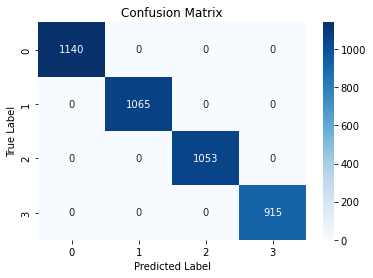

In [104]:
evaluate_classification_model(rf_clf2,X_trainn,y_trainn)

### Svm evaluation

Accuracy: 0.8142822909178049
Precision: 0.8137258794305329
Recall: 0.8142822909178049
F1-score: 0.8138656698544225


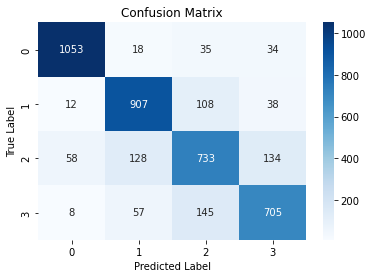

In [105]:
evaluate_classification_model(clf2,X_trainn,y_trainn)

### Knn evaluation 

Accuracy: 0.8837766594775941
Precision: 0.8850015773393685
Recall: 0.8837766594775941
F1-score: 0.8825034931851811


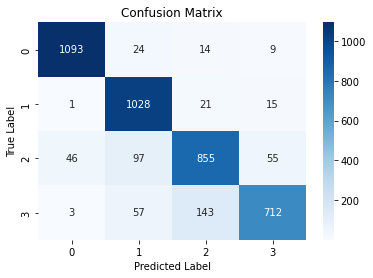

In [106]:
evaluate_classification_model(knn2,X_trainn,y_trainn)
